### **直方图反向投影**

区域如果显示的是**结构纹理**或者**独特形状**，那么这个区域直方图就可看作这个结构或形状的**概率函数**，在图像中寻找这种**概率分布**就是寻找纹理或者特征形状

反向投影就是计算某一特征的直方图模型，然后根据模型判断该图像中是否存在该特征的方法，使用calBackProject函数时有一下四个步骤：
1. 加载待反向投影的图像和模板图像
2. 转换颜色空间，常用有GRAY和HSV
3. 计算直方图，灰度图像为1维直方图，HSV图像直方图为关于H-S通道的二维直方图
4. 将待反向投影的图像和模板图像的直方图输入函数，得到反向投影的结果

In [13]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [14]:
# 读取图像并判断是否读取成功
origin_image = cv.imread(rootpath +'calcBackProject.jpg')[:,:,[2,1,0]]
template_image = cv.imread(rootpath +'calcBackProject_template.jpg')[:,:,[2,1,0]]
if origin_image is None or template_image is None:
    print('Failed to read calcBackProject.jpg or calcBackProject_template.jpg')
    sys.exit

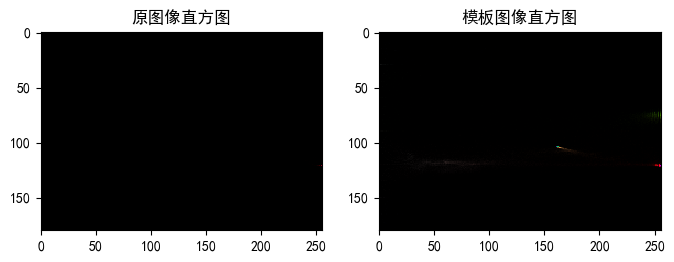

In [15]:
# 计算前需要将图像由BGR格式转换为HSV格式， H通道取值为[0, 180], S通道取值为[0, 255], V通道值全为255
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:, :, 0] = h
hsv_map[:, :, 1] = s
hsv_map[:, :, 2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)
# 分别将其颜色空间从RGB转换为HSV
origin_hsv = cv.cvtColor(origin_image, cv.COLOR_BGR2HSV)
template_hsv = cv.cvtColor(template_image, cv.COLOR_BGR2HSV)
# 计算模板图像和原图像的直方图
template_hist = cv.calcHist([template_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
origin_hist = cv.calcHist([origin_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
# 将计算出的直方图矩阵和创建的hsv_map相乘
template_result = hsv_map * template_hist[:, :, np.newaxis] / 255.0
origin_result = hsv_map * origin_hist[:, :, np.newaxis] / 255.0
# 绘制直方图并展示
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('原图像直方图')
plt.imshow(np.uint8(template_result), interpolation='nearest')
plt.subplot(1, 2, 2)
plt.title('模板图像直方图')
plt.imshow(np.uint8(origin_result), interpolation='nearest')

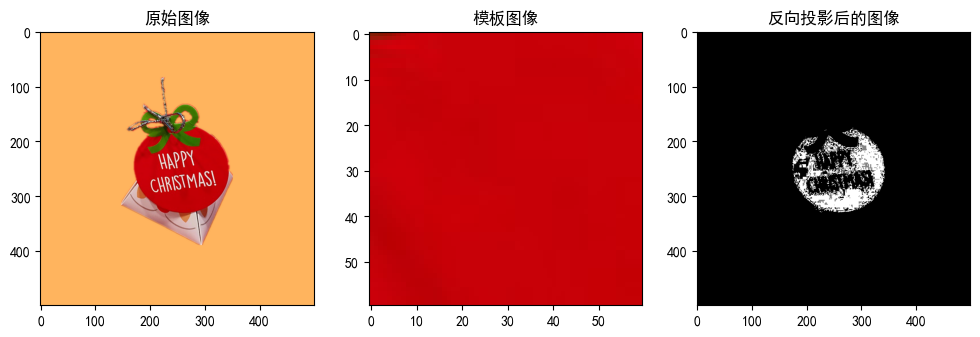

In [18]:
# 对模板图像的直方图进行线性归一化处理
cv.normalize(template_hist, template_hist, 0, 255, cv.NORM_MINMAX)
# 计算直方图的反向投影
result = cv.calcBackProject([origin_hsv], [0, 1], template_hist, [0, 180, 0, 256], 1)
# 展示图像结果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(origin_image)
plt.subplot(1, 3, 2)
plt.title('模板图像')
plt.imshow(template_image)
plt.subplot(1, 3, 3)
plt.title('反向投影后的图像')
plt.imshow(result, cmap='gray')